# Imports

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# Data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Description

In [3]:
print('Train shape:', train_images.shape)
print('Test shape:', test_images.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


In [6]:
test_labels.shape

(10000,)

In [16]:
np.max(train_images)

np.uint8(255)

In [17]:
np.min(train_images)

np.uint8(0)

# EDA

In [11]:
int(train_labels[4])

9

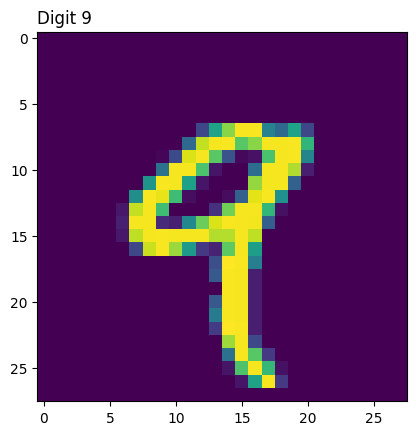

In [14]:
digit = train_images[4]
plt.imshow(digit)
plt.title(f'Digit {str(int(train_labels[4]))}', loc='left')
plt.show()

## Slicing

In [17]:
train_images[10: 100].shape

(90, 28, 28)

In [19]:
train_images[:, 14:, 14:].shape

(60000, 14, 14)

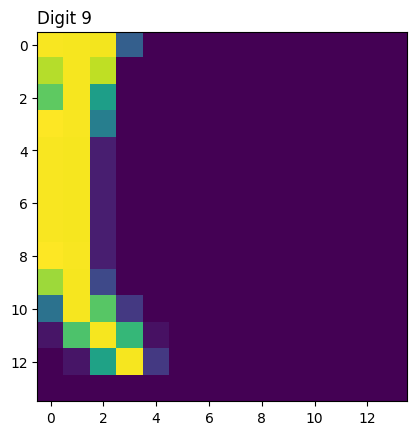

In [20]:
digit = train_images[4, 14:, 14:]
plt.imshow(digit)
plt.title(f'Digit {str(int(train_labels[4]))}', loc='left')
plt.show()

In [22]:
train_images[:, 7:-7, 7:-7].shape

(60000, 14, 14)

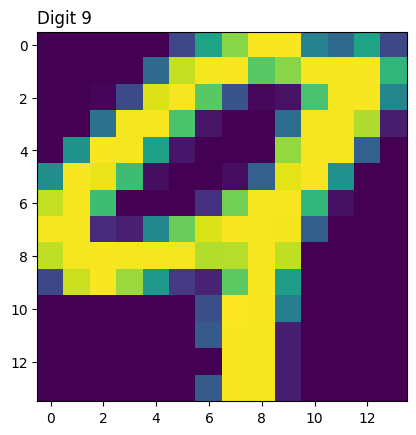

In [23]:
digit = train_images[4, 7:-7, 7:-7]
plt.imshow(digit)
plt.title(f'Digit {str(int(train_labels[4]))}', loc='left')
plt.show()

# Preprocessing

In [3]:
train_images_prep = train_images.reshape((60_000, 28 * 28))
train_images_prep = train_images_prep.astype('float32') / 255

test_images_prep = test_images.reshape((10_000, 28 * 28))
test_images_prep = test_images_prep.astype('float32') / 255

In [23]:
train_images[0].shape

(28, 28)

In [22]:
train_images_prep[0].shape

(784,)

In [24]:
train_images_prep.shape

(60000, 784)

# Neural Network

In [4]:
# Model architecture
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [5]:
# Model optimization
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['Accuracy']
)

2025-05-04 20:58:25.701539: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
# Train
model.fit(train_images_prep, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - Accuracy: 0.8735 - loss: 0.4370
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - Accuracy: 0.9670 - loss: 0.1151
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - Accuracy: 0.9787 - loss: 0.0718
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - Accuracy: 0.9848 - loss: 0.0502
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - Accuracy: 0.9892 - loss: 0.0362


In [25]:
test_digits = test_images_prep[:10]

In [26]:
test_digits

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
predictions = model.predict(test_digits)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [31]:
predictions[0].argmax()

np.int64(7)

In [33]:
predictions[0][7]

np.float32(0.9997366)

In [35]:
test_labels[0]

np.uint8(7)

In [9]:
test_loss, test_acc = model.evaluate(test_images_prep, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Accuracy: 0.9767 - loss: 0.0774  


In [10]:
test_loss

0.06507965177297592

In [11]:
test_acc

0.98089998960495

# Data Representation

## Scalars (rank-0 tensors)

In [13]:
np.array(7).ndim

0

In [32]:
np.array(7).shape

()

## Vectors (rank-1 tensors)

In [33]:
# 1 dimensional tensor
print(np.array([1, 2, 3, 4, 5, 6, 7]).ndim)

# 7 dimensional vector
np.array([1, 2, 3, 4, 5, 6, 7]).shape

1


(7,)

## Metrices (rank-2 tensors)

    (sample, features)

In [28]:
# Column/ row data
# Matrix
np.array([[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]]).ndim

2

In [34]:
np.array([[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]]).shape

(3, 5)

## Rank-3 and higher-rank tensors

    (sample, timesteps, features)

In [31]:
# Data cube
# Multidimensional data
np.array([[[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]],
          
         [[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]],
         
         [[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]]]).ndim

3

In [35]:
np.array([[[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]],
          
         [[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]],
         
         [[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]]]).shape

(3, 3, 5)

In [36]:
np.array([[[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]],
          
         [[1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5],
          [1, 2, 3, 4, 5]]]).shape

(2, 3, 5)

### Rank-4

    images
    (samples, height, width, channels)

### Rank-5 

    video
    (samples, frames, height, witdh, channels)

## Notation

Axis 0: Sample data

    batch axis

In [25]:
train_images[:128].shape

(128, 28, 28)

# Tensor Operation

## Relu

    relu(dot(input, w) b)

    A dot product between the input tensor and a tensor named w (weight)

    An addition (+) between the resulting matrix and a vector b (bias)

    A relu operation: relu(x) ix max(x, 0) (retified linear unit)

In [30]:
print(tf.nn.relu(np.array(10 * 2 + 1)))

tf.Tensor(21, shape=(), dtype=int64)


In [31]:
print(tf.nn.relu(np.array(-10 * 2 + 1)))

tf.Tensor(0, shape=(), dtype=int64)


In [51]:
print(tf.nn.relu(np.array(np.dot(-10, 2) + 1)))

tf.Tensor(0, shape=(), dtype=int64)


## Element wise

     Applied independently to each entry in the tensors

     Pro parallel implementation (vectorized implementations)

     Don by BLAS (Basic Linear Algebra Subprograms)

         Fortran
         C

## Broadcasting

    Math the smaller tensor to the shape of larger

In [42]:
# Arrays with different dimensions
X = np.random.random((32, 10))
y = np.random.random((10,))

In [35]:
X.shape

(32, 10)

In [36]:
y.shape

(10,)

In [37]:
X.ndim

2

In [38]:
y.ndim

1

In [43]:
# Add dimension
y = np.expand_dims(y, axis=0)
y.ndim

2

In [44]:
y.shape

(1, 10)

In [47]:
[y] * 32

[array([[0.54174745, 0.17466724, 0.14170832, 0.46667585, 0.6643968 ,
         0.64929224, 0.17006039, 0.60677614, 0.78738805, 0.02892217]]),
 array([[0.54174745, 0.17466724, 0.14170832, 0.46667585, 0.6643968 ,
         0.64929224, 0.17006039, 0.60677614, 0.78738805, 0.02892217]]),
 array([[0.54174745, 0.17466724, 0.14170832, 0.46667585, 0.6643968 ,
         0.64929224, 0.17006039, 0.60677614, 0.78738805, 0.02892217]]),
 array([[0.54174745, 0.17466724, 0.14170832, 0.46667585, 0.6643968 ,
         0.64929224, 0.17006039, 0.60677614, 0.78738805, 0.02892217]]),
 array([[0.54174745, 0.17466724, 0.14170832, 0.46667585, 0.6643968 ,
         0.64929224, 0.17006039, 0.60677614, 0.78738805, 0.02892217]]),
 array([[0.54174745, 0.17466724, 0.14170832, 0.46667585, 0.6643968 ,
         0.64929224, 0.17006039, 0.60677614, 0.78738805, 0.02892217]]),
 array([[0.54174745, 0.17466724, 0.14170832, 0.46667585, 0.6643968 ,
         0.64929224, 0.17006039, 0.60677614, 0.78738805, 0.02892217]]),
 array([[0.54

In [49]:
Y = np.concatenate([y] * 32, axis=0)

In [50]:
Y.shape

(32, 10)

## Tensor product

    dot

    The operation over two vectors will be the sum of the multiplication of element by element axis

    Vectors: z += x[i] * y[i]

    Matrix:  z[i] += x[i, j] * y[j]

In [54]:
X[0, 0]

np.float64(0.40426019629830323)